In [1]:
using Pkg
Pkg.activate("..")
using ElementalFunctionsTests

  Activating project at `~/Documents/Academia/taylor/ElementalFunctionsTests`


In [2]:
using JSON
import Unmarshal
using Plots
using Printf
using PrettyTables
include("setupPlots.jl")

setupLabels (generic function with 1 method)

In [3]:
function inrange(x, a=-Inf, b=Inf)
    return a < x ≤ b
end

inrange (generic function with 3 methods)

In [4]:
function filterResults(errors, a, b)
    return filter((x)->inrange(abs(x.maxError.err),a, b), errors)
end

filterResults (generic function with 1 method)

# Float64

In [5]:
Unmarshal.unmarshal(T::Type{ElementalFunctionsTests.AbstractError}, x::Error, verbose::Bool, verboseLvl::Int64) = x
Unmarshal.unmarshal(T::Type{StepRangeLen}, br::Vector{Any}, verbose::Bool, verboseLvl::Int64) =  range(first(br), last(br), length=length(br))
function Unmarshal.unmarshal(DT::Type{ElementalFunctionsTests.AbstractError}, parsedJson::Dict{String, Any}, verbose::Bool, verboseLvl::Int64)
    parsedJson["x"] = eval(Meta.parse(parsedJson["x"])) 
    return Unmarshal.unmarshal(Error, parsedJson)
end

### Distribución de números flotantes

In [6]:
RFD = JSON.parsefile("Float64Errors_FloatDistribution.json")
RFD = Unmarshal.unmarshal(Array{TestsResults}, RFD)
nothing

In [23]:
default(size=(900,900))
function logtolerant(arr)
    map(x-> x != 0 ? x : 0.0001, arr)
end

logtolerant (generic function with 1 method)

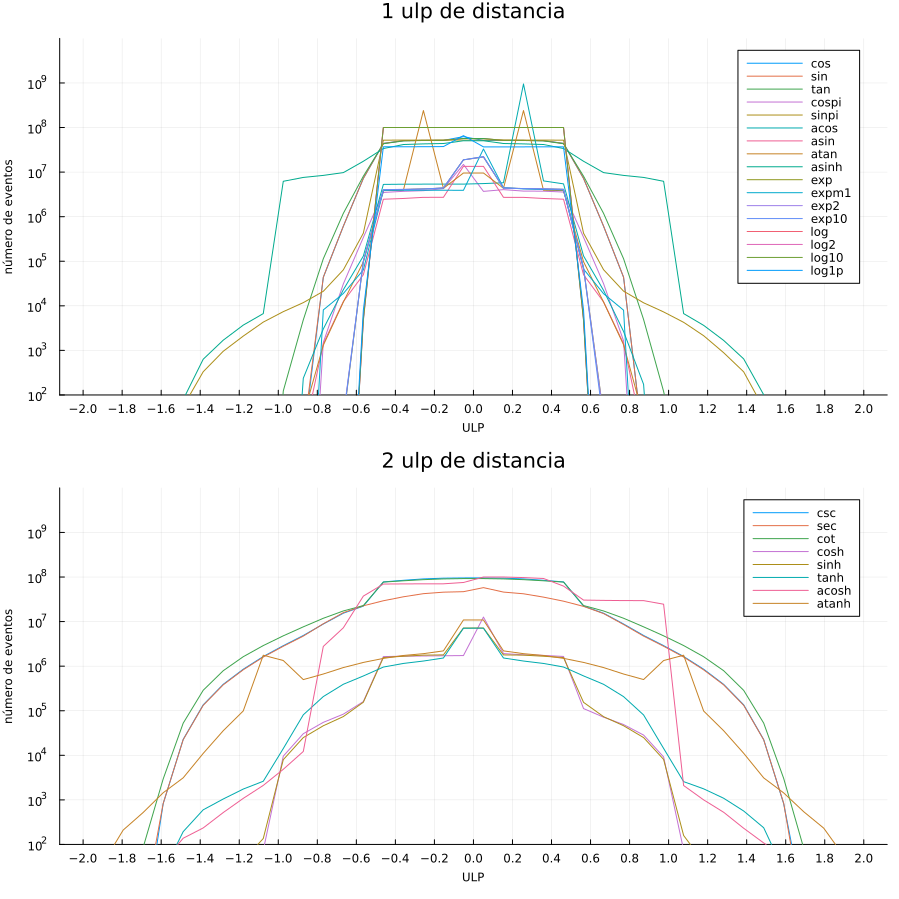

In [25]:
correct = filterResults(RFD, prevfloat(0.0), 0.5)
ulp1 = filterResults(RFD, 0.5, 1.5)
ulp2 = filterResults(RFD, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ]
# l = @layout [a ; b ; c]
# p1 = plot(r, setupBuckets(correct), label=setupLabels(correct), guidefont=font(8))
# title!("correctos")
p2 = plot(r, logtolerant(setupBuckets(ulp1)), label=setupLabels(ulp1))
title!("1 ulp de distancia")
p3 = plot(r, logtolerant(setupBuckets(ulp2)), label=setupLabels(ulp2))
title!("2 ulp de distancia")
plot(p2, p3, layout = l, xticks = -2:0.2:2, size=(900,900),  guidefont=font(8), yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10))
xlabel!("ULP")
ylabel!("número de eventos")
# savefig("hist_RFD")

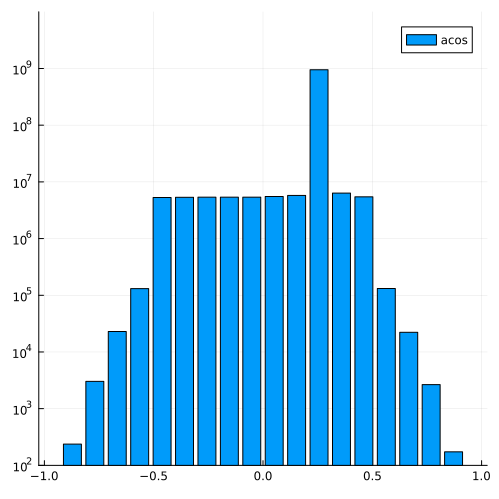

In [70]:
lupa = 12:29 
p = bar(r[lupa], RFD[6].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10), size=(500,500), label="acos")
savefig("images/acos_RFD")
p

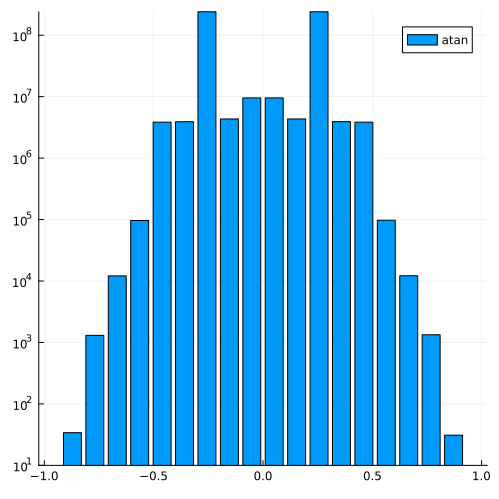

In [71]:
lupa = 12:29 
p = bar(r[lupa], RFD[8].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), size=(500,500), label="atan")
savefig("images/atan_RFD")
p

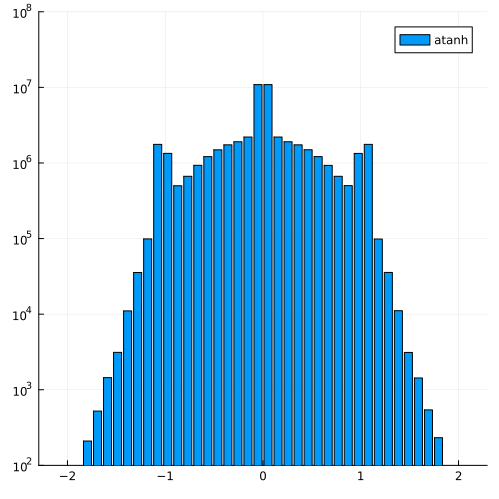

In [72]:
p = bar(r, RFD[17].buckets, size=(500,500),  yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^8), label="atanh")
savefig("images/atanh_RFD")
p

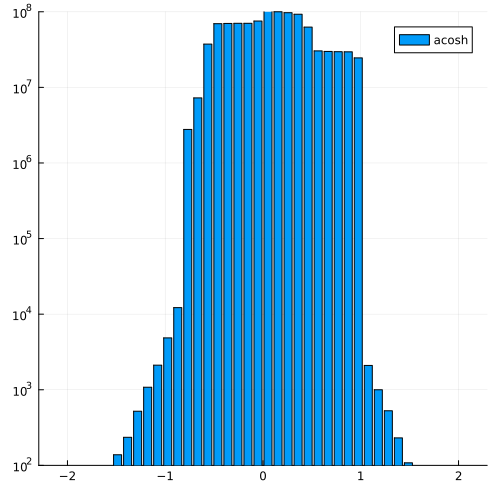

In [73]:
p = bar(r, RFD[15].buckets, size=(500,500),  yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^8), label="acosh")
savefig("images/acosh_RFD")
p

### Peores casos
Primero analizaremos los peores casos en cuestion de los casos un mayor porcetaje de números mal redondeodedos.
En segundo lugar vamos a analizar las funciones con peores errores maximos.

In [33]:
p = vcat(
        sort(
            map(foo->begin 
                incorrectos = (sum(foo.buckets[1:15]) + sum(foo.buckets[26:40]))/foo.batchsize*100
                ulp2 = (sum(foo.buckets[1:5]) + sum(foo.buckets[36:40])) / foo.batchsize*100 
                return [foo.f incorrectos ulp2]
            end, RFD), 
        by=x->x[2], rev=true)...
)
pretty_table(p, header=["función", "P(err=1 ULP)", "P(err=2 ULP)"])#, backend = Val(:latex))


┌─────────┬──────────────┬──────────────┐
│ función │ P(err=1 ULP) │ P(err=2 ULP) │
├─────────┼──────────────┼──────────────┤
│   acosh │      19.1439 │      1.66e-5 │
│     cot │      14.0448 │     0.000613 │
│     csc │      11.4682 │    0.0001643 │
│     sec │      11.4111 │     0.000167 │
│   asinh │      9.90046 │          0.0 │
│     tan │      1.88146 │          0.0 │
│     sin │      1.57756 │          0.0 │
│     cos │      1.57625 │          0.0 │
│   atanh │      1.31265 │    0.0004481 │
│    tanh │     0.261047 │       5.0e-6 │
│   sinpi │     0.107718 │          0.0 │
│   cospi │    0.0751822 │          0.0 │
│    sinh │    0.0616022 │       1.3e-6 │
│    cosh │    0.0610112 │       1.3e-6 │
│    acos │    0.0313909 │          0.0 │
│    atan │    0.0221029 │          0.0 │
│   expm1 │    0.0184198 │          0.0 │
│   exp10 │    0.0171507 │          0.0 │
│    exp2 │    0.0170936 │          0.0 │
│     exp │    0.0170447 │          0.0 │
│    asin │    0.0127216 │        

In [ ]:
for peorFoo in first(sort(RFD, rev=true, by=x->abs(x.maxError.err)), 5)
    incorrectos = sum(peorFoo.buckets[1:15]) + sum(peorFoo.buckets[26:40])
    p = incorrectos/peorFoo.batchsize
        println(peorFoo.f)
        println(incorrectos/peorFoo.batchsize)
end

## Sección Gamma

In [33]:
γ = JSON.parsefile("Float64Errors_GammaSection.json")
γ = Unmarshal.unmarshal(Array{TestsResults}, γ)
nothing

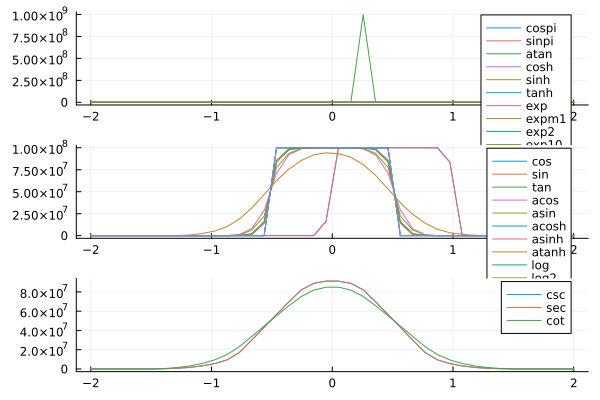

In [91]:
correct = filterResults(γ, prevfloat(0.0), 0.5)
ulp1 = filterResults(γ, 0.5, 1.5)
ulp2 = filterResults(γ, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ; c]
p1 = plot(r, setupBuckets(correct), label=setupLabels(correct))
p2 = plot(r, setupBuckets(ulp1), label=setupLabels(ulp1))
p3 = plot(r, setupBuckets(ulp2), label=setupLabels(ulp2))
plot(p1, p2, p3, layout = l)

In [40]:
1.3 ∈ 1:1.4

false

In [45]:
ulperror()

"∈" can be typed by \in<tab>

search: ∈



```
in(collection)
∈(collection)
```

Create a function that checks whether its argument is [`in`](@ref) `collection`, i.e. a function equivalent to `y -> y in collection`. See also [`insorted`](@ref) for use with sorted collections.

The returned function is of type `Base.Fix2{typeof(in)}`, which can be used to implement specialized methods.

---

```
in(item, collection) -> Bool
∈(item, collection) -> Bool
```

Determine whether an item is in the given collection, in the sense that it is [`==`](@ref) to one of the values generated by iterating over the collection. Returns a `Bool` value, except if `item` is [`missing`](@ref) or `collection` contains `missing` but not `item`, in which case `missing` is returned ([three-valued logic](https://en.wikipedia.org/wiki/Three-valued_logic), matching the behavior of [`any`](@ref) and [`==`](@ref)).

Some collections follow a slightly different definition. For example, [`Set`](@ref)s check whether the item [`isequal`](@ref) to one of the elements; [`Dict`](@ref)s look for `key=>value` pairs, and the `key` is compared using [`isequal`](@ref).

To test for the presence of a key in a dictionary, use [`haskey`](@ref) or `k in keys(dict)`. For the collections mentioned above, the result is always a `Bool`.

When broadcasting with `in.(items, collection)` or `items .∈ collection`, both `item` and `collection` are broadcasted over, which is often not what is intended. For example, if both arguments are vectors (and the dimensions match), the result is a vector indicating whether each value in collection `items` is `in` the value at the corresponding position in `collection`. To get a vector indicating whether each value in `items` is in `collection`, wrap `collection` in a tuple or a `Ref` like this: `in.(items, Ref(collection))` or `items .∈ Ref(collection)`.

See also: [`∉`](@ref).

# Examples

```jldoctest
julia> a = 1:3:20
1:3:19

julia> 4 in a
true

julia> 5 in a
false

julia> missing in [1, 2]
missing

julia> 1 in [2, missing]
missing

julia> 1 in [1, missing]
true

julia> missing in Set([1, 2])
false

julia> (1=>missing) in Dict(1=>10, 2=>20)
missing

julia> [1, 2] .∈ [2, 3]
2-element BitVector:
 0
 0

julia> [1, 2] .∈ ([2, 3],)
2-element BitVector:
 0
 1
```

See also: [`insorted`](@ref), [`contains`](@ref), [`occursin`](@ref), [`issubset`](@ref).

---

```
in(p, sc)
```

Returns true if `p` is in `sc`. In the case that `sc` is a SortedDict or SortedMultiDict, `p` is a key=>value pair. In the case that `sc` is a SortedSet, `p` should be a key. Time: O(*c* log *n* + *d*) for SortedDict and SortedSet, where *d* stands for the time to compare two values. In the case of SortedMultiDict, the time is O(*c* log *n* + *dl*), and *l* stands for the number of entries that have the key of the given pair. (So therefore this call is inefficient if the same key addresses a large number of values, and an alternative should be considered.)

---

```
in(p, sc)
```

Returns true if `p` is in `sc`. In the case that `sc` is a SortedDict or SortedMultiDict, `p` is a key=>value pair. In the case that `sc` is a SortedSet, `p` should be a key. Time: O(*c* log *n* + *d*) for SortedDict and SortedSet, where *d* stands for the time to compare two values. In the case of SortedMultiDict, the time is O(*c* log *n* + *dl*), and *l* stands for the number of entries that have the key of the given pair. (So therefore this call is inefficient if the same key addresses a large number of values, and an alternative should be considered.)


In [13]:
613/17

36.05882352941177